# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [1]:

import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head(100)

,ali,anthony,bill,dave,jim,joe,john,kenny,louis,mike,noah,ricky,seinfeld
aaaaaa,0,0,0,0,0,0,0,2,0,0,0,0,0
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,1,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,3,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
afford,1,0,0,0,0,0,1,0,0,1,0,1,0
afghan,0,0,1,0,0,0,0,0,0,0,0,1,0
afghani,0,0,0,0,0,0,0,0,0,1,0,0,0
afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Find  and print the top 30 words said by each comedian

In [2]:

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, wanna, gotta, husband, right, time, got, cause, day, women, people, pregnant, need, hes, god, yeah, tell, theyre, really
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, say, just, day, guys, people, tell, youre, grandma, right, think, thing, time, jokes, school, yeah, good, did, baby, gonna, ive, okay
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, want, think, fuck, people, hes, did, guy, didnt, make, come, going, thing, theyre, theres, let, doing
---
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, thats, fuck, fucking, black, man, good, got, right, gonna, gay, lot, did, yeah, hes, oj, oh, come, kevin, guys
---
jim
like, im, dont, right, fucking, went, know, just, youre, people, thats, day, oh, think, going, fuck, goes, thing, said, guns, theyre, good, ive, theres, got, cause, women, want, hes, really
---
joe
like, people, 

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.

In [3]:

from collections import Counter


words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'wanna',
 'gotta',
 'husband',
 'right',
 'time',
 'got',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'yeah',
 'tell',
 'theyre',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'say',
 'just',
 'day',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'think',
 'thing',
 'time',
 'jokes',
 'school',
 'yeah',
 'good',
 'did',
 'baby',
 'gonna',
 'ive',
 'okay',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'people',
 'hes',
 'did',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'theres',
 'let',
 'doing',
 'like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'dont',
 'ahah',
 'time',
 'thats',
 'fuck',
 'fucking',
 'black',
 'man',
 'good',
 

#### Let's aggregate this list and identify the most common words along with how many routines they occur in

In [4]:

Counter(words).most_common()

[('like', 13),
 ('im', 13),
 ('know', 13),
 ('just', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 13),
 ('people', 13),
 ('youre', 12),
 ('got', 11),
 ('gonna', 9),
 ('think', 9),
 ('oh', 8),
 ('time', 8),
 ('yeah', 8),
 ('thing', 8),
 ('hes', 7),
 ('said', 7),
 ('say', 7),
 ('going', 7),
 ('shit', 6),
 ('cause', 6),
 ('theyre', 6),
 ('really', 6),
 ('want', 6),
 ('didnt', 6),
 ('theres', 6),
 ('day', 5),
 ('did', 5),
 ('good', 4),
 ('ive', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('come', 4),
 ('lot', 3),
 ('women', 3),
 ('guys', 3),
 ('guy', 3),
 ('make', 3),
 ('man', 3),
 ('went', 3),
 ('life', 3),
 ('little', 3),
 ('ok', 2),
 ('wanna', 2),
 ('gotta', 2),
 ('tell', 2),
 ('joke', 2),
 ('okay', 2),
 ('goes', 2),
 ('house', 2),
 ('kids', 2),
 ('real', 2),
 ('hey', 2),
 ('mom', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('feel', 2),
 ('love', 2),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('school', 1),
 ('baby', 1),
 ('

#### If more than half of the comedians have it as a top word, exclude it from the list

In [5]:

add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think',
 'oh',
 'time',
 'yeah',
 'thing',
 'hes',
 'said',
 'say',
 'going']

In [6]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

C:\Users\Jitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# # Let's make some word clouds!
# # Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
# from wordcloud import WordCloud

# wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
#                max_font_size=150, random_state=42)

In [1]:
# # Reset the output dimensions
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [16, 6]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr','Dave Chappelle', 'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Kenny Sebastian', 'Louis C.K.', 'Mike Birbiglia','Trevor Noah',  'Ricky Gervais','Jerry Seinfeld']
# # Create subplots for each comedian
# for index, comedian in enumerate(data.columns):
#     wc.generate(data_clean.transcript[comedian])
    
#     plt.subplot(3, 4, index+1)
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(full_names[index])
    
# plt.show()

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [9]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1016
7,Kenny Sebastian,1074
8,Louis C.K.,1132
10,Trevor Noah,1269
4,Jim Jefferies,1339
0,Ali Wong,1375
3,Dave Chappelle,1414
6,John Mulaney,1429
5,Joe Rogan,1467
12,Jerry Seinfeld,1470


In [10]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79, 60]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1016,2957,59,50.118644
7,Kenny Sebastian,1074,3298,63,52.349206
6,John Mulaney,1429,4065,77,52.792208
8,Louis C.K.,1132,3378,62,54.483871
0,Ali Wong,1375,3329,60,55.483333
12,Jerry Seinfeld,1470,3557,60,59.283333
10,Trevor Noah,1269,4617,76,60.750000
5,Joe Rogan,1467,4625,73,63.356164
11,Ricky Gervais,1675,5049,79,63.911392
3,Dave Chappelle,1414,4111,60,68.516667


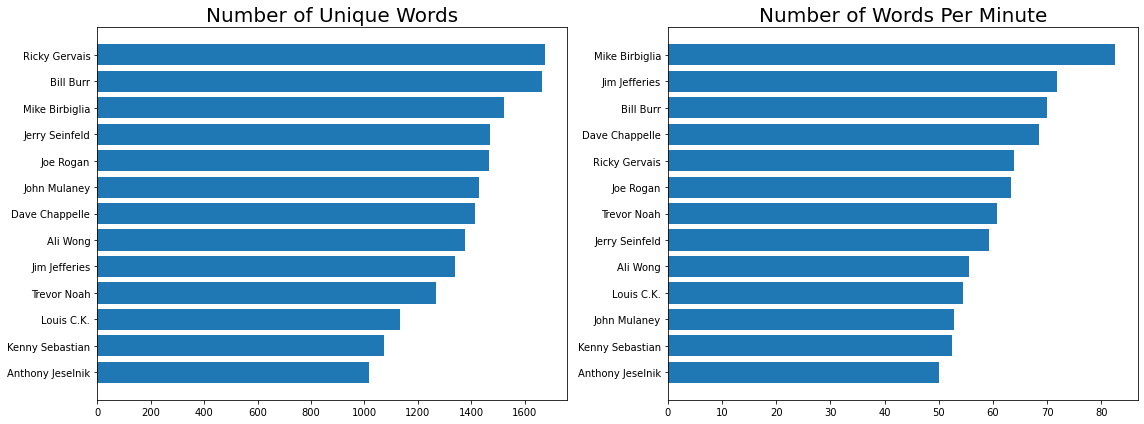

In [11]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [12]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 13),
 ('im', 13),
 ('know', 13),
 ('just', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 13),
 ('people', 13),
 ('youre', 12),
 ('got', 11),
 ('gonna', 9),
 ('think', 9),
 ('oh', 8),
 ('time', 8),
 ('yeah', 8),
 ('thing', 8),
 ('hes', 7),
 ('said', 7),
 ('say', 7),
 ('going', 7),
 ('shit', 6),
 ('cause', 6),
 ('theyre', 6),
 ('really', 6),
 ('want', 6),
 ('didnt', 6),
 ('theres', 6),
 ('day', 5),
 ('did', 5),
 ('good', 4),
 ('ive', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('come', 4),
 ('lot', 3),
 ('women', 3),
 ('guys', 3),
 ('guy', 3),
 ('make', 3),
 ('man', 3),
 ('went', 3),
 ('life', 3),
 ('little', 3),
 ('ok', 2),
 ('wanna', 2),
 ('gotta', 2),
 ('tell', 2),
 ('joke', 2),
 ('okay', 2),
 ('goes', 2),
 ('house', 2),
 ('kids', 2),
 ('real', 2),
 ('hey', 2),
 ('mom', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('feel', 2),
 ('love', 2),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('school', 1),
 ('baby', 1),
 ('

In [13]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,107,64
dave,65,46
jim,115,20
joe,0,40
john,4,6
kenny,0,22
louis,21,25
mike,0,0


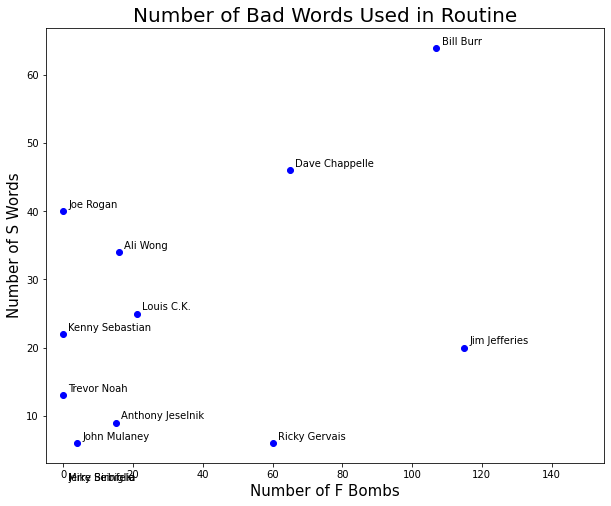

In [14]:
# Let's create a scatter plot of our findings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Assignment 4:(optional)

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [17]:
Counter(words).most_common()

data_bad_words2 = data.transpose()[['murder','white','black','gay']]
data_profanity2 = pd.concat([data_bad_words2.murder, data_bad_words2.white + data_bad_words2.black + data_bad_words2.gay], axis=1)
data_profanity2.columns = ['bad_word_count','racist_word_count']
data_profanity2

,bad_word_count,racist_word_count
ali,0,16
anthony,0,3
bill,0,14
dave,1,63
jim,3,14
joe,0,27
john,0,9
kenny,0,0
louis,18,5
mike,0,1


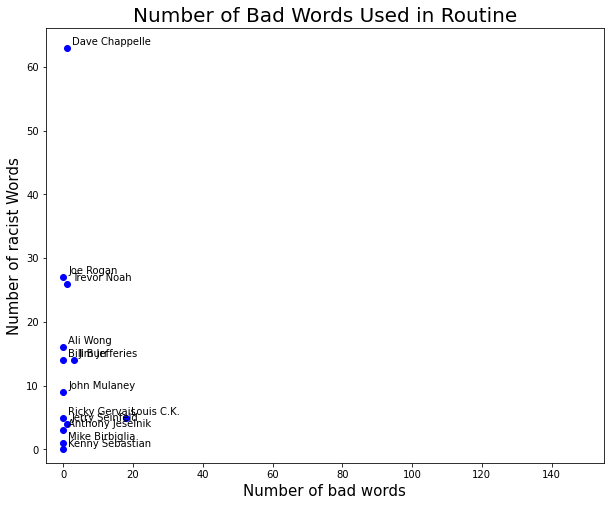

In [19]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity2.index):
    x = data_profanity2.bad_word_count.loc[comedian]
    y = data_profanity2.racist_word_count.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of bad words', fontsize=15)
plt.ylabel('Number of racist Words', fontsize=15)

plt.show()